# Bay Wheels Data Exploration
## by Adrienne Terrado

## Preliminary Wrangling

> Bay Wheels is a ride sharing company owned by Lyft. Lyft shares its system data publically on its website, albeit all trip information is kept anonymous. The dataset contains location data, the duration of each trip, whether or not the user was a subscriber, as well as many others useful for analysis. I've chosen to focus on system data for both March 2019 and 2020. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [2]:
df = pd.read_csv('202003-baywheels-tripdata.csv')
df19 = pd.read_csv('201903-fordgobike-tripdata.csv')

In [3]:
print(df.shape)

(176799, 14)


In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN


In [5]:
list(df)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'rental_access_method']

In [6]:
df.duration_sec.describe()

count    176799.000000
mean        861.590156
std        1528.143090
min          60.000000
25%         374.000000
50%         602.000000
75%         963.000000
max       84450.000000
Name: duration_sec, dtype: float64

In [7]:
print(len(df.start_station_name.unique()), len(df.end_station_name.unique()))

448 448


In [8]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
rental_access_method        object
dtype: object

In [9]:
df.user_type.value_counts([0])

Subscriber    0.544471
Customer      0.455529
Name: user_type, dtype: float64

In [10]:
df.groupby('start_station_name').size()

start_station_name
10th Ave at E 15th St                                     21
10th Ave at Irving St                                    213
10th St at Empire St                                      21
10th St at Fallon St                                      76
10th St at Mission St                                     40
                                                        ... 
Williams Ave at Apollo St                                 47
Willow St at Blewett Ave                                  31
Willow St at Vine St                                       4
Woolsey St at Sacramento St                              175
Yerba Buena Center for the Arts (Howard St at 3rd St)    374
Length: 447, dtype: int64

## Clean

`Change`

- duration_sec from seconds to minutes
- start_time and end_time to type: datetime
- user_type to type: category

`Code`

In [11]:
df.duration_sec = df.duration_sec / 60
df.rename({'duration_sec': 'duration_min'}, axis=1, inplace = True)
df19.duration_sec = df19.duration_sec / 60
df19.rename({'duration_sec': 'duration_min'}, axis=1, inplace = True)

df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df19.start_time = pd.to_datetime(df19.start_time)
df19.end_time = pd.to_datetime(df19.end_time)

df.user_type = df.user_type.astype('category')

### What is the structure of your dataset?

> There are 176799 rides in this dataset described by 14 features. Most features give location information, but others, such as user type (consumer vs subscriber), ride duration, and time data are included as well. 

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in how ridership behavior changes over the course of the month of March, especially since this can reflect changes due to on-going restrictions regarding Covid19.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> This information is essentially imbedded in the dataset's time feature, but we can extract other interesting information as well, such as areas that maintain high levels of Lyft rider traffic despite Covid restrictions. These relationships can be found by analyzing time data in conjunction with that of ride locations. 

## Univariate Exploration

`Goals`

Analyze the distribution of features in our dataset.

#### Number of Rides per Starting Location

161.0


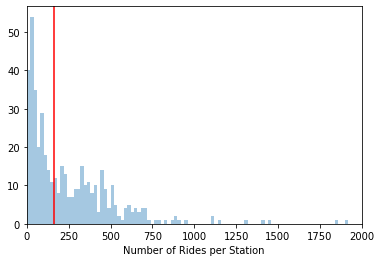

In [12]:
# Filter out Nans (not recognized by sn.distplot)
num_rides = df[df.start_station_name.isna() == False].start_station_name.value_counts()

sn.distplot(num_rides, bins = np.arange(0, 2020, 20), kde=False)
plt.xlim(0, 2000)
plt.axvline(num_rides.median(), color = 'red')
plt.xlabel('Number of Rides per Station')
print(num_rides.median())
plt.show();

#### Trip numbers for the top 25 stations

In [13]:
# Get list of 25 most popular starting locations by ride counts
top25_list = df[df.start_station_name.isna() == False]['start_station_name'].value_counts().index[0:24]

# Filter DataFrame for locations of interest
top25 = df[df.start_station_name.isin(top25_list)]

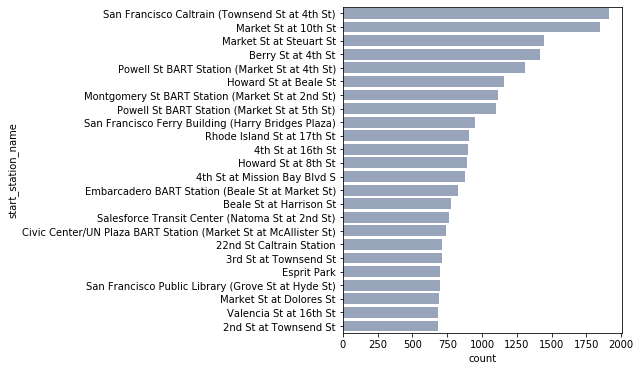

In [14]:
plt.figure(figsize=(5, 6))
sn.countplot(y=top25['start_station_name'], order = top25_list, color = 'cornflowerblue', saturation = 0.25)

#### Number of Rides per Destination

158.0


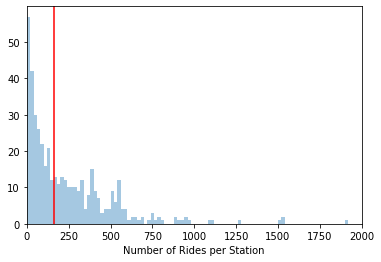

In [15]:
# Filter out Nans (not recognized by sn.distplot)
num_rides_end = df[df.end_station_name.isna() == False].end_station_name.value_counts()

sn.distplot(num_rides_end, bins = np.arange(0, 2020, 20), kde=False)
plt.xlim(0, 2000)
plt.axvline(num_rides.median(), color = 'red')
plt.xlabel('Number of Rides per Station')
print(num_rides_end.median())
plt.show();

In [16]:
# Get list of 25 most popular destinations by ride counts
top25_list = df[df.end_station_name.isna() == False]['end_station_name'].value_counts().index[0:24]

# Filter DataFrame for locations of interest
top25 = df[df.end_station_name.isin(top25_list)]

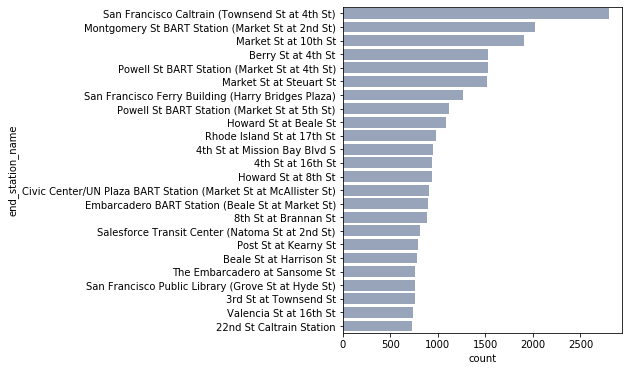

In [17]:
plt.figure(figsize=(5, 6))
sn.countplot(y=top25['end_station_name'], order = top25_list, color = 'cornflowerblue', saturation = 0.25)

`Figures`

Median counts for rides from both starting and ending locations are around 160, but a small subset of stations are ridden to and from more than 2000 times. 

#### Distribution of Trip Durations

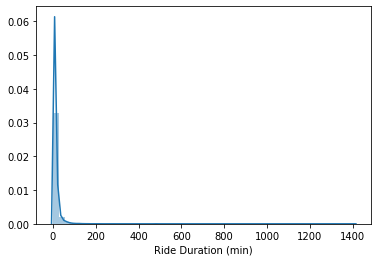

In [18]:
sn.distplot(df.duration_min)
plt.xlabel('Ride Duration (min)');

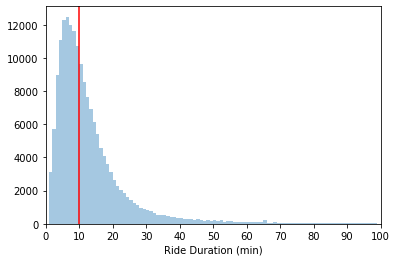

In [19]:
sn.distplot(df.duration_min, bins = np.arange(0,100), kde=False)
plt.axvline(df.duration_min.median(), color = 'red')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 110, 10))
plt.xlabel('Ride Duration (min)')
plt.show();

`Figures`

Most rides taken are relatively short. However, a handful of others last on the order of multiple hours. 

#### Distribution of Trip Start and End Times

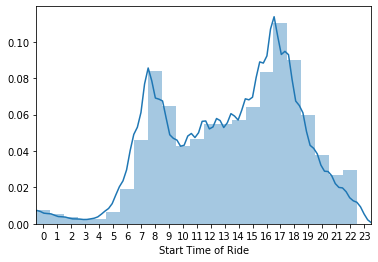

In [20]:
sn.distplot(df.start_time.dt.hour, bins = np.arange(0, 24))
plt.xticks(np.arange(0.5, 24.5), np.arange(0, 24))
plt.xlim(0, 24)
plt.xlabel("Start Time of Ride");

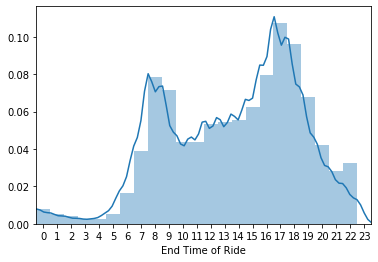

In [21]:
sn.distplot(df.end_time.dt.hour, bins = np.arange(0, 24))
plt.xticks(np.arange(0.5, 25.5), np.arange(0, 24))
plt.xlim(0, 24)
plt.xlabel("End Time of Ride");

`Figures`

Peak Lyft use appears to mirror typical rush hour times, alluding to the fact that several customers use Bay Wheels to commute to work/school.

#### Distribution of Trips Taken per Bike

In [22]:
len(df.bike_id.unique())

8430

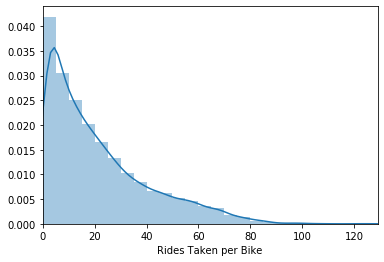

In [23]:
sn.distplot(df.bike_id.value_counts(), bins = np.arange(0, df.bike_id.value_counts().max()+5, 5))
plt.xlim(0, df.bike_id.value_counts().max()+5)
plt.xlabel("Rides Taken per Bike");

`Figure`

Most bikes are only ridden a handful of times per month, which reflects the low numbers of rides from certain stations.

#### Distribution of Rides Taken per Day

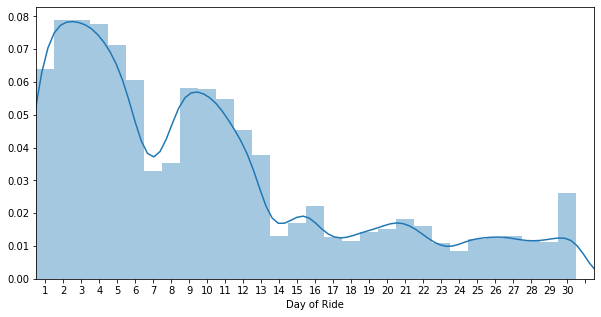

In [24]:
plt.figure(figsize = (10, 5))
sn.distplot(df.end_time.dt.day, bins = np.arange(0, 32))
plt.xticks(np.arange(1.5, 32.5), np.arange(1, 31))
plt.xlim(1, 32)
plt.xlabel("Day of Ride");

`Figure`

Ride numbers rise and fall throughout the month, with peaks corresponding to weekdays and troughs to weekends. We also see a stark trend in ride decline over the month. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The spread for the numbers of trips taken per station (location) is incredibly high, with some only receiving a handful of rides, while others see numbers in the thousands. The distributions of trips taken per hour as well as trips taken per day was especially enlightening. The bimodal distributions of rides per hour reflects regular commuter use, while the drop in Bay Wheels use over the month fell in line with Covid-related stay-at-home orders.

> One unusual feature was ride duration. Rides are listed in seconds in Lyft's system data, but it was adjusted to minutes as that was a more relevant unit. I expected most rides to last for less than 20 minutes, but I didn't expect to see the few rides that lasted for more than an hour.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> If March of this year were any ordinary month, the steep drop off in Bay Wheels use would be incredibly surprising and concerning. Seeing that there was a pandemic, the drop off is not surprising, but I suppose it is still concerning. 

> The Lyft data didn't require much wrangling, but certain features such as start times were converted to datetime, and ride durations were changed to minutes. It's hard to wrap your head around a ride that lasted 2873 seconds.

## Bivariate Exploration

`Goals:`

- Explore changes in trip features over the course of March
- Observe changes in ride numbers for the most popular locations
- Observe changes in ride numbers for the most popular BART locations

### Changes in ridership over the month of March

In [25]:
# Create counts DataFrame for 2020
ride_cts20 = df[['duration_min']].groupby(by=[df.start_time.dt.day]).count()
ride_cts20.columns = ['num_rides20']

# Create counts DataFrame for 2019
ride_cts19 = df19[['duration_min']].groupby(by=[df19.start_time.dt.day]).count()
ride_cts19.columns = ['num_rides19']

# Combine DataFrames 
ride_cts = ride_cts20.join(ride_cts19)
ride_cts.index.names = ['day']

ride_cts = ride_cts.reset_index()
ride_cts['yoy'] = (ride_cts['num_rides20'] / ride_cts['num_rides19'])*100
ride_cts.head()

,day,num_rides20,num_rides19,yoy
0,1,11355,9078,125.082617
1,2,13948,3073,453.888708
2,3,13936,4066,342.744712
3,4,13755,8940,153.859060
4,5,12590,7101,177.298972


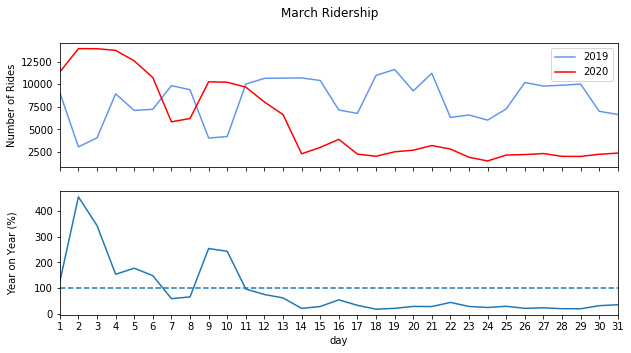

In [26]:
day_ticks = np.arange(1, 32, 1)

f, ax = plt.subplots(2, 1, sharex=True, figsize=(10,5))
sn.lineplot(data = ride_cts, x='day', y = 'num_rides19', label = '2019', color = 'cornflowerblue', ax=ax[0])
sn.lineplot(data = ride_cts, x='day', y = 'num_rides20', label = '2020', color = 'red', ax=ax[0])
ax[0].set_xlim(xmin=1, xmax=31)
ax[0].set_xticks(day_ticks)
ax[0].set_ylabel('Number of Rides')
plt.xlabel('Day')
plt.suptitle('March Ridership')
ax[0].legend()

sn.lineplot(data = ride_cts, x='day', y = 'yoy', ax=ax[1])
ax[1].set_ylabel('Year on Year (%)')
plt.axhline(y=100, linestyle = '--');

f.align_ylabels()

`Figures`

Versus 2019, March ridership this year has dropped precipitously. Earlier in the month, ridership was greater than it had been versus the previous year due to company growth. However, this trend falls rapidly as the month progresses, reflecting Covid-related restrictions (concerning work, for instance) and general public reluctance to handle property that isn't regularly sanitized.

### Changes in Ridership by Destination

`Goal`

Find which destinations retained normal or gained greater ridership numbers during the Covid19 quarantine by comparing the number of rides taken at the end of the month to those taken at the beginning. 

In [27]:
# Group DataFrame by destinations and week of the year
rides20 = df.groupby([df.end_station_name, df.start_time.dt.week]).size()
rides20.index.names = ['destination', 'week']
rides20 = pd.DataFrame(rides20)
rides20.columns = ['num_of_rides']
rides20 = rides20.reset_index()
rides20.head(4)

,destination,week,num_of_rides
0,10th Ave at E 15th St,9,1
1,10th Ave at E 15th St,10,10
2,10th Ave at E 15th St,12,1
3,10th Ave at E 15th St,13,4


In [28]:
# Get names of destinations in DataFrame
destinations = rides20.destination.unique()

In [29]:
change = []
for destination in destinations: 
    change.append(rides20[(rides20.destination == destination) & ((rides20.week == 12) | 
                                                                      (rides20.week == 13))].sum()[2] /\
                  rides20[(rides20.destination == destination) & ((rides20.week == 10) | 
                                                                      (rides20.week == 11))].sum()[2])

/Users/adrienneterrado/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


In [30]:
# Create DataFrame for changes in rides taken over March
ridership = pd.DataFrame({'destinations': destinations, 'change':change})

# Convert change to a percentage
ridership.change = ridership.change*100

ridership.head()

,destinations,change
0,10th Ave at E 15th St,50.000000
1,10th Ave at Irving St,38.686131
2,10th St at Empire St,166.666667
3,10th St at Fallon St,4.225352
4,10th St at Mission St,35.714286


In [31]:
# Total number of stations analyzed
ridership.shape[0]

447

In [32]:
# Number of stations where ridership decreased over the month of March
ridership[ridership.change < 100].shape[0]

412

In [33]:
dest_gains = ridership[ridership.change != np.inf].sort_values('change', ascending = False).iloc[0:24]

Text(0.5, 0, 'Change in Ridership (%)')

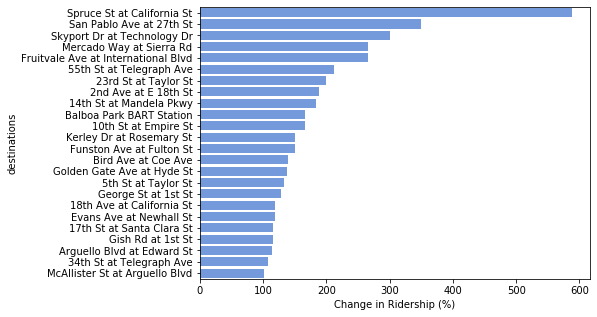

In [34]:
plt.figure(figsize=(7,5))
sn.barplot(data=dest_gains, y='destinations', x='change', color = 'cornflowerblue')
plt.xlabel('Change in Ridership (%)')

`Notes`

Changes were calculated by dividing the number of rides taken in the last two weeks of the month by those taken in the first two weeks, and multiplying that value by 100. Thus 100% represents no changes in the number of rides taken. 

It would be interesting to find any similarities amongst these destinations, especially since the vast majority of destinations saw decreases in ridership numbers over the month due to Covid19. Let's compare this with the distribution of changes over all stations. 

In [35]:
# Drop destinations that saw ridership increase infinitely
inf = ridership[ridership.change == np.inf].index
inf

ridership.drop(inf, axis = 0, inplace = True)

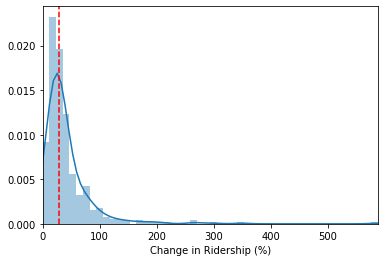

In [36]:
# Distribution of changes in ridership
sn.distplot(ridership.change)
plt.xlim(xmin = 0, xmax=ridership.change.max())
plt.axvline(ridership.change.median(), color = 'r', linestyle = 'dashed')
plt.xlabel('Change in Ridership (%)')
plt.show()

`Figure`

Distribution of changes in ridership by destination between the beginning of March and the end of March. Changes were calculated by dividing the number of rides taken in the last two weeks of the month by those taken in the first two weeks, and multiplying that value by 100. Thus 100% represents no changes in the number of rides taken. The vast majority of destinations experience a precipitous decrease in traffic. The median is plotted in red.

`Notes`

The destinations listed in `rides20` that gained ridership may have only been included because they initially had very few patrons arriving in that destination in the first place. Therefore, a marginal increase in ridership will appear very large. 

It might be better to filter our DataFrame by destinations where the number of rides is greater than the median number of rides for the whole DataFrame.

In [37]:
# Filter destinations by only including those that have more rides than the median amount for the whole dataset
stations = df.groupby('end_station_name').size().reset_index(name = 'rides')
pop_list = stations[stations.rides > stations.rides.median()].end_station_name
pop_subset = df[df.end_station_name.isin(pop_list)]

# Create the same DataFrame as before
pop_subset = pop_subset.groupby([pop_subset.end_station_name, pop_subset.start_time.dt.week]).size()
pop_subset.index.names = ['destination', 'week']
pop_subset = pd.DataFrame(pop_subset)
pop_subset.columns = ['num_of_rides']
pop_subset = pop_subset.reset_index()

# Get list of popular destinations
pop_destinations = pop_subset.destination.unique()

# Get the change in ridership over the month of March
pop_change = []
for destination in pop_destinations: 
    pop_change.append(pop_subset[(pop_subset.destination == destination) & ((pop_subset.week == 12) | 
                                                                      (pop_subset.week == 13))].sum()[2] /\
                  pop_subset[(pop_subset.destination == destination) & ((pop_subset.week == 10) | 
                                                                      (pop_subset.week == 11))].sum()[2])

pop_ridership = pd.DataFrame({'destinations': pop_destinations, 'change':pop_change})
pop_ridership.change = pop_ridership.change*100

/Users/adrienneterrado/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


In [38]:
pop_ridership[(pop_ridership.change >= 100)]

,destinations,change
26,48th Ave at Cabrillo St,inf
99,Funston Ave at Fulton St,150.000000
140,McAllister St at Arguello Blvd,102.173913


There are far fewer destinations listed here than the first, which we would expect. This is likely a better representation of destinations that experienced similar or increased ridership. 

The increased numbers of customers riding to 48th Ave at Cabrillo St is interesting. On Google maps, the only commercial building in the area is a SafeWay. Potentially more people rode to Cabrillo St to do emergency grocery shopping. 

In [39]:
rides20[rides20.destination == '48th Ave at Cabrillo St']

,destination,week,num_of_rides
342,48th Ave at Cabrillo St,12,87
343,48th Ave at Cabrillo St,13,69
344,48th Ave at Cabrillo St,14,18


Some destinations saw traffic decrease by more than 90 percent.

In [40]:
pop_ridership.sort_values('change').head(5)

,destinations,change
205,University Ave at Oxford St,2.448980
123,Irwin St at 8th St,3.597122
43,Battery St at Filbert St,5.037783
177,San Francisco Caltrain (Townsend St at 4th St),5.891413
174,Salesforce Transit Center (Natoma St at 2nd St),6.208719


In [41]:
# Drop destinations that saw ridership increase infinitely
pop_inf = pop_ridership[pop_ridership.change == np.inf].index
pop_inf

pop_ridership.drop(pop_inf, axis = 0, inplace = True)

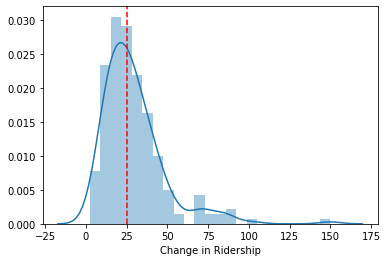

In [42]:
sn.distplot(pop_ridership.change)
plt.xlabel('Change in Ridership')
plt.axvline(pop_ridership.change.median(), color = 'r', linestyle = 'dashed')

`Figure`

Distribution of changes in ridership by destination between the beginning of March and the end of March. Changes were calculated by dividing the number of rides taken in the last two weeks of the month by those taken in the first two weeks, and thus 1 represents no changes in the number of rides taken. Most destinations saw their user traffic decrease by three quarters. 

### Changes in trip start times over March

In [43]:
# Add time columns

df['week'] = df.start_time.dt.week
df['start_hour'] = df.start_time.dt.hour
df['day'] = df.start_time.dt.day
df['dow'] = df.start_time.dt.dayofweek

df19['week'] = df19.start_time.dt.week
df19['start_hour'] = df19.start_time.dt.hour
df19['day'] = df19.start_time.dt.day
df19['dow'] = df19.start_time.dt.dayofweek

df['duration_hour'] = df.duration_min / 60

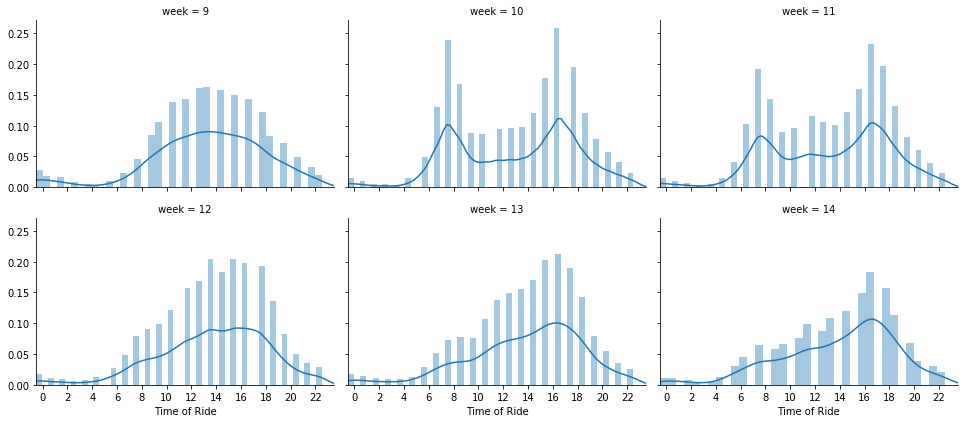

In [44]:
g = sn.FacetGrid(data=df, col = 'week', col_wrap=3, aspect = 1.5)
g.map(sn.distplot, 'start_hour')
g = (g.set_axis_labels("Time of Ride").set(xlim=(0,24), xticks=(np.arange(0.5, 26.5, 2)), xticklabels=(np.arange(0, 26, 2))))

`Figure`

Here we can see that the distribution of rides throughout the day for each week differ as the month progresses. Again, weeks here are noted as weeks of the year, so week 9 and week 14 presumably contain only either weekdays or weekends. 

In [45]:
# Create dictionary to create weekend vs weekday column as day_type
_map = {k:'weekday' for k in np.arange(6)}
_map.update({k:'weekend' for k in np.arange(6,8)})

# Create column
df['day_type'] = df.start_time.dt.dayofweek
df['day_type'].replace(_map, inplace = True)
df['day_type'] = df['day_type'].astype('category')

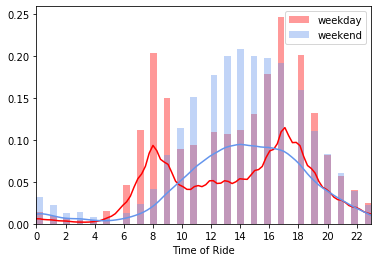

In [46]:
sn.distplot(df[df.day_type == 'weekday'].start_hour, color = 'red', label = 'weekday')
sn.distplot(df[df.day_type == 'weekend'].start_hour, color = 'cornflowerblue', label = 'weekend')
plt.xlim(xmin=0, xmax=23)
plt.xticks(np.arange(0, 23, 2))
plt.xlabel('Time of Ride')
plt.legend()

`Figure`

From this figure, we can see that the distribution of rides actually differs between weekdays and weekends. Thus, we should remove week 9 and week 14 data from the figure just prior in order to only retain data on weeks that contain both weekdays and weekends.

`Note`

I suppose this data is enlightening in itself. The first peak likely represents users biking to work or school in the morning. 

In [47]:
# Remove data from weeks 9 and 14
df_cut = df[df.week.isin([9, 14]) == False]
df_cut19 = df19[df19.week.isin([9, 14]) == False]

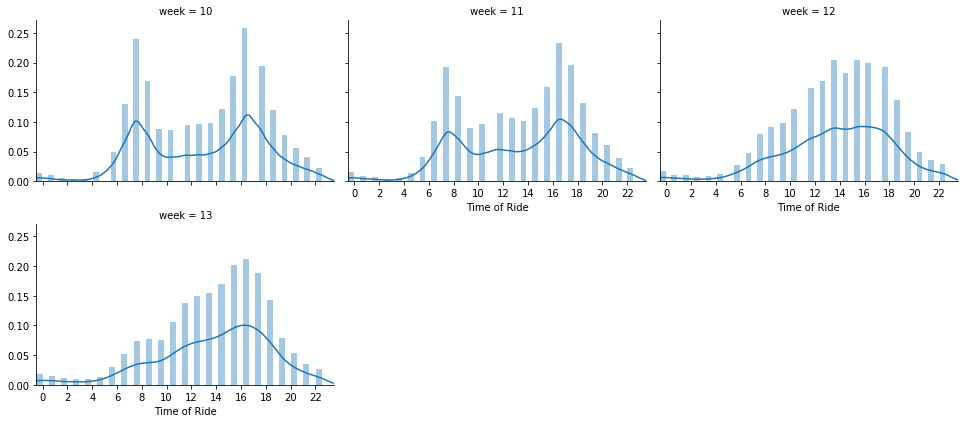

In [48]:
g = sn.FacetGrid(data=df_cut, col = 'week', col_wrap=3, aspect = 1.5)
g.map(sn.distplot, 'start_hour')
g = (g.set_axis_labels("Time of Ride").set(xlim=(0,24), xticks=(np.arange(0.5, 26.5, 2)),
                                           xticklabels=(np.arange(0, 26, 2))))

`Figure`

Here we can see that the distribution shifts from bimodal to unimodal. One could imagine that the first peak had been due to users commuting to work in the morning. However, with more people working from home due to Covid, morning bike use decreases. 

`Notes`

- As a check, we should see how the same data was distributed in 2019.
- We could also see if this trend is reflected in stations that saw only a small decrease in ride numbers.

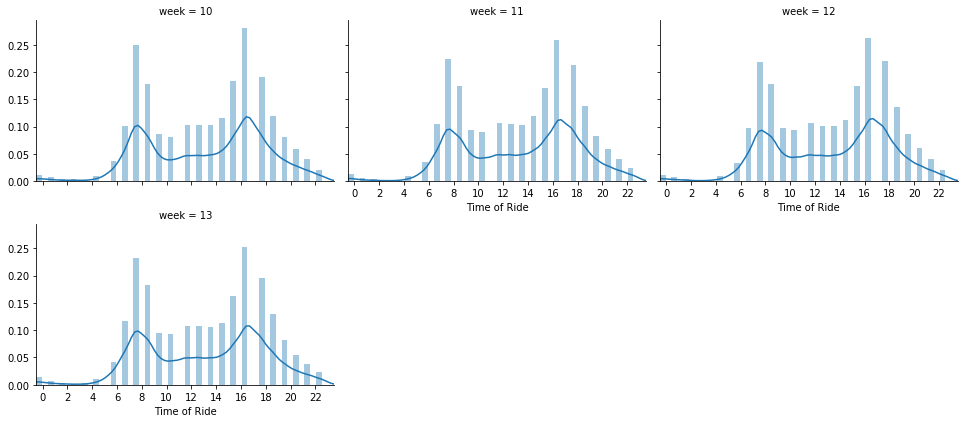

In [49]:
g = sn.FacetGrid(data=df_cut19, col = 'week', col_wrap=3, aspect = 1.5)
g.map(sn.distplot, 'start_hour')
g = (g.set_axis_labels("Time of Ride").set(xlim=(0,24), xticks=(np.arange(0.5, 26.5, 2)),
                                           xticklabels=(np.arange(0, 26, 2))))

`Figure`

Ride distribution throughout the day was bimodal throughout the month of March in 2019.

In [50]:
high_traff_subset = pop_ridership[pop_ridership.change > 0.75]
high_traff_list = high_traff_subset.destinations

high_traff_df = df[df.start_station_name.isin(high_traff_list)]

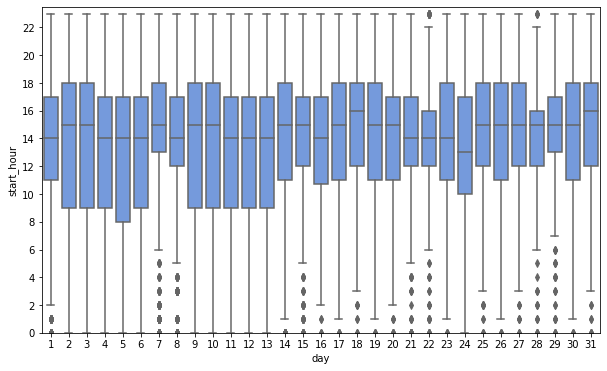

In [51]:
plt.figure(figsize=(10,6))
sn.boxplot(data = high_traff_df, x='day', y='start_hour', color = 'cornflowerblue')
plt.yticks(np.arange(0, 24, 2))
plt.ylim(ymin=0, ymax=23.5);

`Figure`

Even for stations that retained relatively high trip numbers, starting ride times gradually moved later into the day.

### Changes in ride numbers for popular stations

In [52]:
# Pull the top 5 most popular stations
top5 = df.start_station_name.value_counts().index[0:5]
start_subset = df[df.start_station_name.isin(top5)]

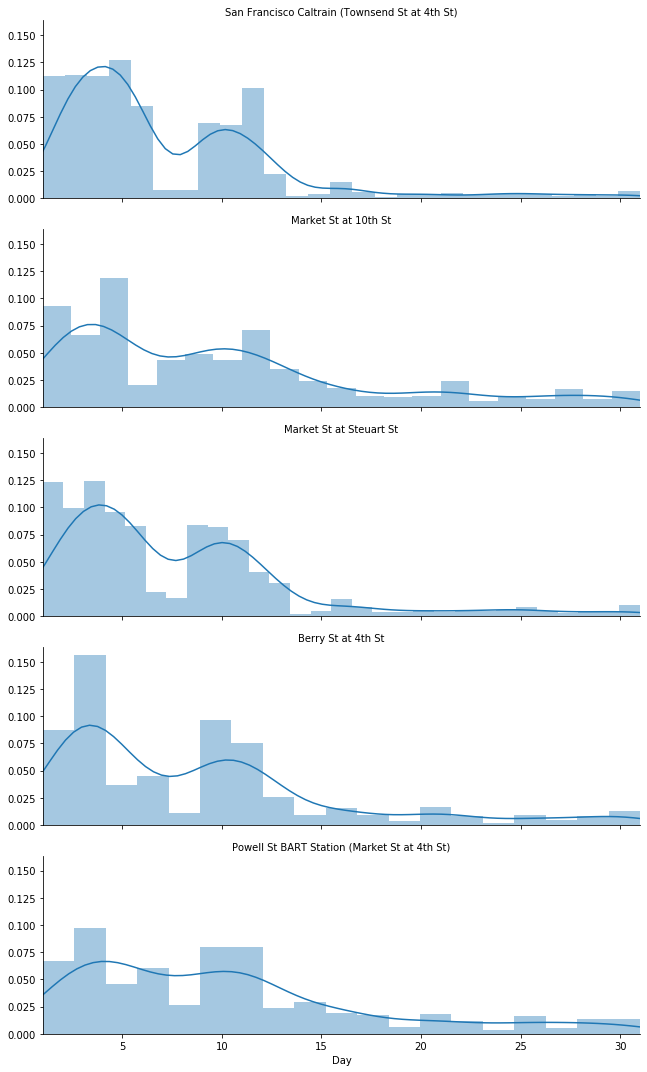

In [53]:
g = sn.FacetGrid(data=start_subset, col = 'start_station_name', col_wrap = 1, sharex=True,
                 margin_titles = True, aspect=3, col_order = top5)
g = g.map(sn.distplot, 'day').set_titles("{col_name}")
g = (g.set_axis_labels("Day").set(xlim=(1, 31)))

`Figure`

As expected, ride numbers decrease throughout the month. There appears to be a dip in ride numbers for all stations shown at around the same time early in the month. Let's compare this data with that from 2019 to see if this observation is expected.

In [54]:
# Top 5 starting locations in 2019
top5_19 = df19.start_station_name.value_counts().index[0:5]
start_subset_19 = df19[df19.start_station_name.isin(top5_19)]

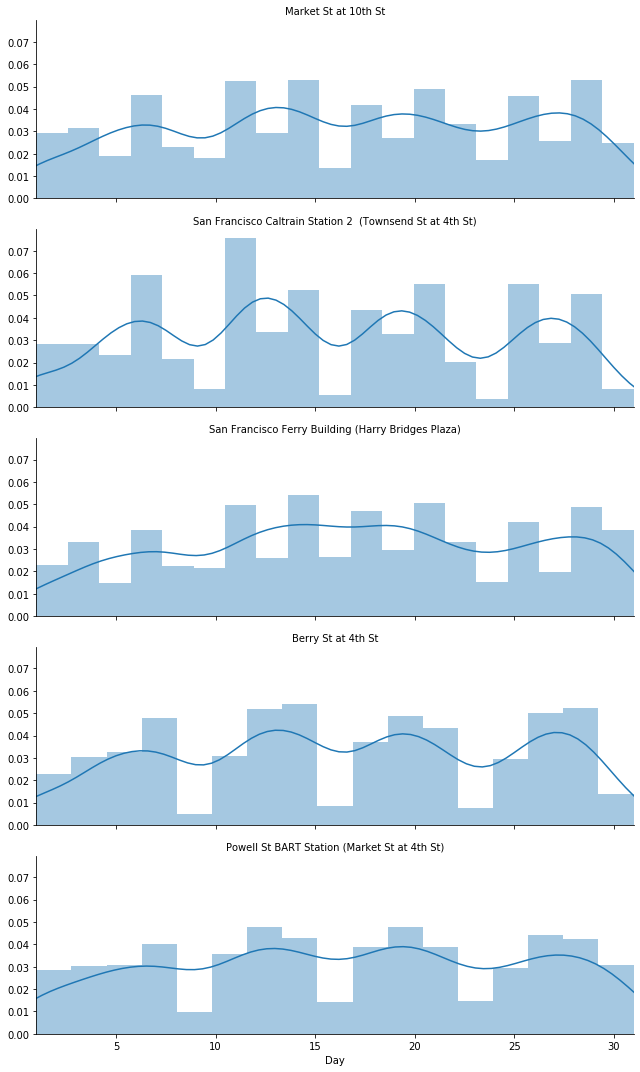

In [55]:
g = sn.FacetGrid(data=start_subset_19, col = 'start_station_name', col_wrap = 1, sharex=True,
                 margin_titles = True, aspect=3, col_order = top5_19)
g = g.map(sn.distplot, 'day').set_titles("{col_name}")
g = (g.set_axis_labels("Day").set(xlim=(1,31)))

`Figure`

Typically there is an oscillation in the number of rides as the days progress from weekday (highs) to weekend (lows). This same trend was present for the first two weeks of March 2020, but rides quickly receded thereafter.

### BART Rides

In [56]:
# Filter for BART stations
df_notnull = df_cut[df_cut.end_station_name.isna() == False]
bart = df_notnull[df_notnull.end_station_name.str.contains('BART')]

In [57]:
# Pull the top 5 most popular BART stations
top5BART = bart.end_station_name.value_counts().index[0:5]
bart_subset = bart[bart.end_station_name.isin(top5BART)]

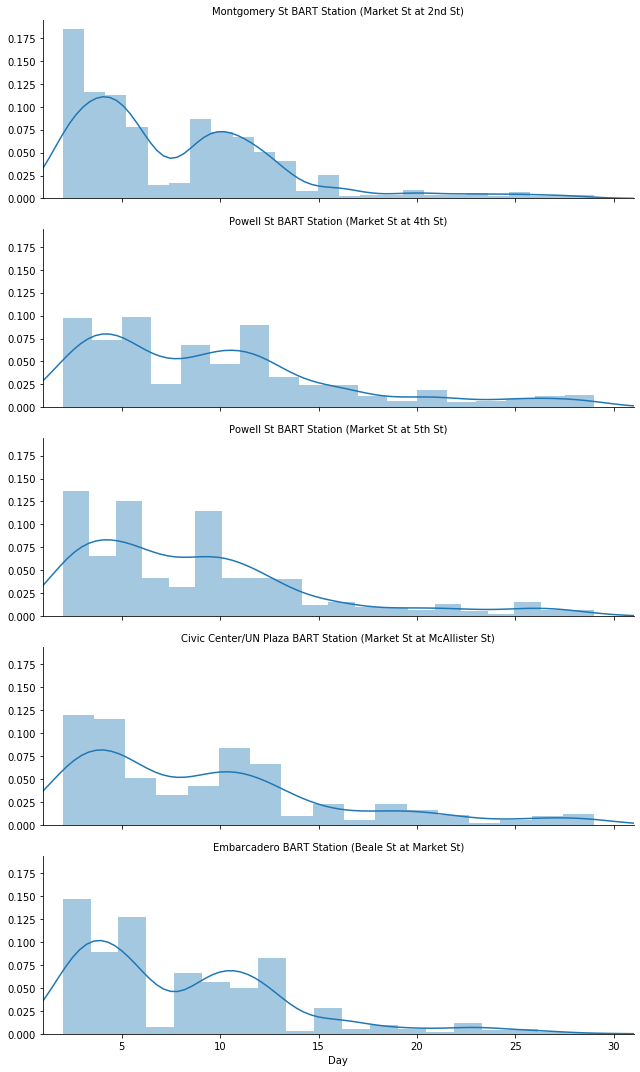

In [58]:
g = sn.FacetGrid(data=bart_subset, col = 'end_station_name', col_wrap = 1, sharex=True,
                 margin_titles = True, aspect=3, col_order = top5BART)
g = g.map(sn.distplot, 'day').set_titles("{col_name}")
g = (g.set_axis_labels("Day").set(xlim=(1, 31)))

`Figure`

BART stations also follow the same trend of steep decline in rides. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As expected, the number of trips taken decreased dramatically between the first weeks and March and the latter weeks. Adjusting for stations that received relatively high traffic overall, this trend of decreasing rider numbers was sustained for each individual station. 

> Over the course of March, the distribution of ride numbers shifted from bimodal to unimodal, reflecting a decrease in use for commuting to work or school due. Ride numbers also decreased significantly in stations that had received the most traffic overall. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There was one interesting data point found when analyzing the change in ride numbers per station. In the first weeks of March, no users rode to 48th Ave at Cabrillo St. In the latter half, however, that number jumped to more that 150. A quick Google searched showed that that location was near a Safeway. Presumably some Lyfters decided to do some emergency grocery shopping.

> There wasn't necessarily anything that was surprising, as the trends were more or less reflective of what I expected. However, it is interesting to see how the data manifests itself in these figures. You can literally see people's behavioral changes over the month. You can imagine more and more users working from home and holing up over the weekend. You might even picture empty streets, with sidewalks presumably littered with Lyft bikes. 

## Multivariate Exploration

`Goals`

- See how rides counts change among days and across the weeks of March as compared to that of last year
- See how popular routes shift over the month
    - Days of the rides
    - Durations of the rides
- How ride durations change over destinations
- Changes in trips taken to BART stations

In [59]:
# Create counts DataFrame for 2019 by week of the year and day of the week
totalRides19 = df19[['duration_min']].groupby(by=[df19.start_time.dt.week, df19.start_time.dt.dayofweek]).count()
totalRides19.columns = ['num_rides19']

# Remove any April data from the 2020 DataFrame
df = df[df.start_time.dt.month == 3]

# Create counts DataFrame for 2020 by week of the year and day of the week
totalRides20 = df[['duration_min']].groupby(by=[df.start_time.dt.week, df.start_time.dt.dayofweek]).count()
totalRides20.columns = ['num_rides20']
totalRides20.head(1)

# Join 2020 and 2019 data
ride_cts_dow = totalRides20.join(totalRides19)
ride_cts_dow.index.names = ['week', 'day_of_week']

ride_cts_dow.head()

num_rides20  num_rides19
week day_of_week                          
9    6                   9623       4066.0
10   0                  13948       8940.0
     1                  13936       7101.0
     2                  13755       7233.0
     3                  12590       9850.0

In [60]:
# Replace numbers with the actual days of the week, where 0 maps to "Monday" and 6 to "Sunday"
daysdict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
ride_cts_dow = ride_cts_dow.reset_index()
ride_cts_dow.day_of_week = ride_cts_dow.day_of_week.replace(daysdict)
ride_cts_dow.dropna(how='any', inplace = True)
# Change the number of rides in 2019 to integers 
ride_cts_dow.num_rides19 = ride_cts_dow.num_rides19.astype(int)
# Remove data from week 9 
ride_cts_dow = ride_cts_dow[ride_cts_dow.week != 9]

ride_cts_dow.head()

,week,day_of_week,num_rides20,num_rides19
1,10,Monday,13948,8940
2,10,Tuesday,13936,7101
3,10,Wednesday,13755,7233
4,10,Thursday,12590,9850
5,10,Friday,10739,9393


In [61]:
# Create a year on year column
ride_cts_dow['yoy'] = (ride_cts_dow['num_rides20'] / ride_cts_dow['num_rides19'])*100
ride_cts_dow.head()

,week,day_of_week,num_rides20,num_rides19,yoy
1,10,Monday,13948,8940,156.017897
2,10,Tuesday,13936,7101,196.254049
3,10,Wednesday,13755,7233,190.170054
4,10,Thursday,12590,9850,127.817259
5,10,Friday,10739,9393,114.329820


/Users/adrienneterrado/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


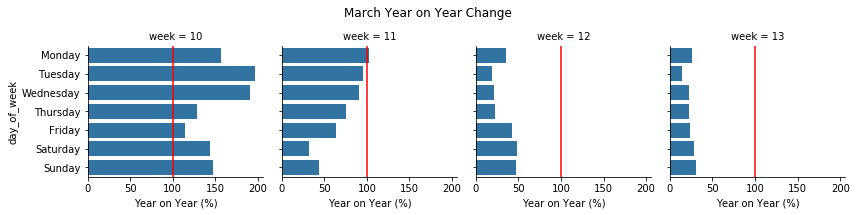

In [62]:
g = sn.FacetGrid(data = ride_cts_dow, col = 'week', height = 3, sharex=True, sharey=True)
g = (g.map(sn.barplot, 'yoy', "day_of_week"))
for ax in g.axes[0]:
    ax.axvline(x=100, color= 'r')
g.set_xlabels('Year on Year (%)')
g.fig.suptitle('March Year on Year Change')
g.fig.subplots_adjust(top=0.8)

`Figure`

Here we can see that ridership decreases over the month of March. Week numbers are labelled as the week number within the whole year, where week 10 and 11 correspond to the beginning of the month and week 12 and 13 to the latter half. Week day ride numbers appear to fall faster than those of weekends, likely the result of users who are no longer commuting to work during the week.

In [63]:
# Create dict to split March into 'early' and 'late' March
_map = {k:'early' for k in [10, 11]}
_map.update({k:'late' for k in [12, 13]})

# Using the DataFrame where weeks 9 and 14 are removed, use dictionary to create week location ('week_loc') column
df_cut['week_loc'] = df.loc[:, 'start_time'].dt.week
df_cut.loc[:, 'week_loc'].replace(_map, inplace = True)

In [64]:
df_cut.week_loc.value_counts()

early    127187
late      33628
Name: week_loc, dtype: int64

In [65]:
# Sort DataFrame by rides taken early in March and group starting and ending location to create a DataFrame of routes
# Count the number of rides taken per route using .size()
earlyPairs = pd.DataFrame(df_cut[df_cut.week_loc == 'early']
                          .groupby(['start_station_name', 'end_station_name']).size())
earlyPairs.columns = ['num_of_rides']

### Top 10 most popular routes early in March

In [66]:
earlyPairs.sort_values('num_of_rides', ascending = False).iloc[0:10]

,,num_of_rides
start_station_name,end_station_name,
Market St at Steuart St,Berry St at 4th St,103
The Embarcadero at Sansome St,Market St at Steuart St,100
Market St at Steuart St,The Embarcadero at Sansome St,95
Broadway at 30th St,19th Street BART Station,84
Market St at 10th St,Montgomery St BART Station (Market St at 2nd St),83
Berry St at 4th St,San Francisco Ferry Building (Harry Bridges Plaza),83
Haste St at College Ave,Bancroft Way at Telegraph Ave,82
Montgomery St BART Station (Market St at 2nd St),San Francisco Caltrain (Townsend St at 4th St),77
5th St at Virginia St,San Fernando St at 4th St,75


### Top 10 most popular routes late in March

In [67]:
latePairs = pd.DataFrame(df_cut[df_cut.week_loc == 'late']
                         .groupby(['start_station_name', 'end_station_name']).size())
latePairs.columns = ['num_of_rides']
latePairs = latePairs.sort_values('num_of_rides', ascending=False).iloc[0:10]
latePairs

,,num_of_rides
start_station_name,end_station_name,
Buchanan St at North Point St,Buchanan St at North Point St,40
7th Ave at Cabrillo St,7th Ave at Cabrillo St,38
Bay St at Fillmore St,Bay St at Fillmore St,36
Funston Ave at Fulton St,Funston Ave at Fulton St,33
Market St at 10th St,Market St at 10th St,33
Funston Ave at Irving St,Funston Ave at Irving St,31
Fell St at Stanyan St,Fell St at Stanyan St,30
McAllister St at Baker St,McAllister St at Baker St,30
McAllister St at Arguello Blvd,McAllister St at Arguello Blvd,29


> This data is super interesting because unlike early in the month, these popular routes involve users starting and ending in the *same location*. I would guess that people are using Lyft bikes as a sort of joy ride over quarantine, unless they were just using the bikes to pick something up and go back home. I can't think of how I could use the data available in the dataset to distinguish between the two potential ride reasons. 

> We can see how certain features vary among these routes between early in March and later on.

In [68]:
# Get list of starting locations for popular pairs
lateLocs = latePairs.index.get_level_values('start_station_name')

In [69]:
# Filter DataFrame for trips of interest
# Choose from trips that have starting and ending locations that are within our lateLocs list of popular
    #roundtrip locations, and then find round trips by setting start_station_name == end_station_name
pairs_df = df_cut[(df_cut.start_station_name.isin(lateLocs)) &
            (df_cut.end_station_name.isin(lateLocs) & 
            (df_cut.start_station_name == df_cut.end_station_name))]

In [70]:
# Split into early and late DataFrames
early_pairs = pairs_df[pairs_df.week_loc == 'early']
late_pairs = pairs_df[pairs_df.week_loc == 'late']

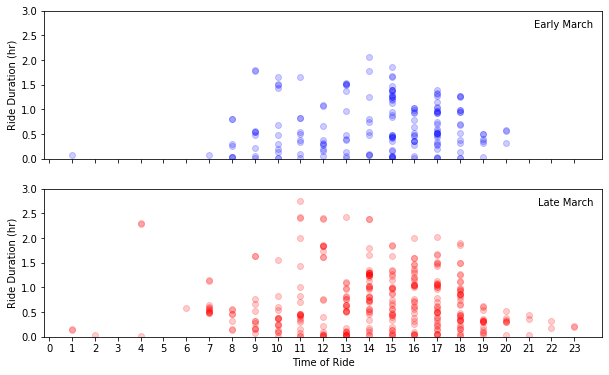

In [71]:
f, ax = plt.subplots(2, 1, figsize = (10, 6), sharex = True, sharey = True)

# Plot early March data
ax[0].scatter(early_pairs['start_hour'], early_pairs['duration_hour'], 
              alpha = 0.2, color = 'b', edgecolors = 'b', label = 'Early March')
# Plot late March data
ax[1].scatter(late_pairs['start_hour'], late_pairs['duration_hour'],
              alpha = 0.2, color = 'r', edgecolors = 'r', label = 'Late March')

# Set axes specifications 
for i in range(len(ax)):
    ax[i].set_ylim(0, 3)
    ax[i].set_ylabel('Ride Duration (hr)')
    # Labels each axis and removes marker
    ax[i].legend(markerscale=0, handletextpad=-1.5, frameon = False)

plt.xticks(np.arange(0, 24))
plt.xlabel('Time of Ride');

`Figure`

Here I've pulled ride durations and ride times for the top 10 routes late in March, and then displayed early and late March data. It seems as though these routes got slightly more popular later in March than earlier, and that some users tended to ride these routes for longer. 

(0, 2.5)

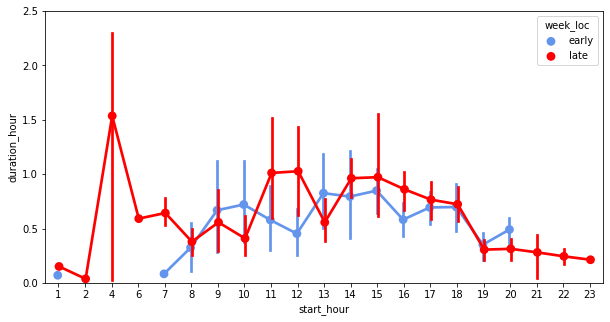

In [72]:
plt.figure(figsize = (10, 5))
sn.pointplot(data=pairs_df, x='start_hour', y='duration_hour', hue='week_loc', dodge=True, 
             hue_order = ['early', 'late'], palette = {'early': 'cornflowerblue', 'late': 'red'})
plt.ylim(0,2.5)

`Figure`

This pointplot contains the same data, but allows you to more easily see potential differences in ride durations over the month. Here we can see that rides do trend a little longer later in March.

`Notes`

Grouping all these stations together might hide interesting nuances in the DataFrame. Next, we'll isolate five of these popular stations and see how the number of rides taken and the duration of each ride changes for each individual station.

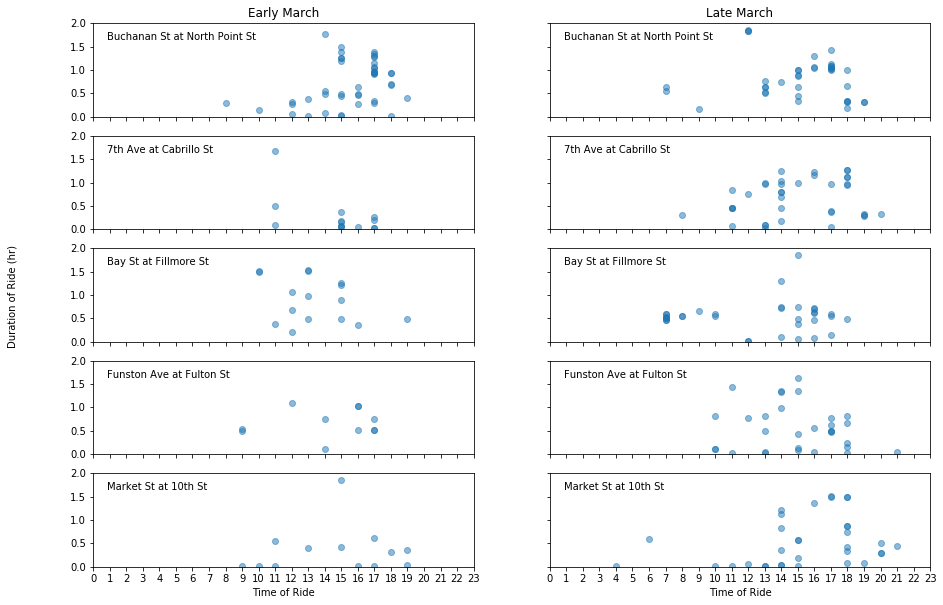

In [73]:
f, ax = plt.subplots(5, 2, figsize=(15, 10), sharex=True, sharey=True)

# First plot early March data on the first column (j==0) with information on the chosen five trips (for i in range(5))
# Then plot late March data on the second column for the same subset
for j in range(2):
    for i in range(5):
        tmp = early_pairs if j==0 else late_pairs
        _df = tmp[tmp.start_station_name == lateLocs[i]]
        ax[i][j].scatter(_df['start_hour'], _df['duration_hour'], alpha = 0.5, label = lateLocs[i])
        ax[i][j].legend(loc = 'upper left', markerscale=0, handletextpad=-1.5, frameon = False)

ax[0][0].set_title('Early March')
ax[0][1].set_title('Late March')
ax[4][0].set_xlabel('Time of Ride') 
ax[4][1].set_xlabel('Time of Ride')
f.text(0.05, .5, 'Duration of Ride (hr)', ha = 'center', va='center', rotation = 'vertical')
plt.xlim(0, 23)
plt.xticks(np.arange(0, 24))
plt.ylim(0, 2);

`Figure`

Save for Buchanan St, all other stations listed do experience an increase in ridership. Interestingly, both in early and late March, several round trips out of these bike stations lasted for upwards of an hour, and others far longer. Again, the average trip for the whole DataFrame is only around 15 minutes, so the fact that these trips are so long warrants some research. While it might be interesting to see if these rides are taken by the same users from week to week, we are unable to do so because each trip is kept anonymous. 

### BART Rides

In [74]:
# Filter out null values
notnull = df_cut[df_cut.start_station_name.isna() == False]

# Pull data on BART locations
bart = notnull[notnull.start_station_name.str.contains('BART')]

In [75]:
# Create early and late BART DataFrames
earlyBART = bart[bart.week_loc == 'early']
lateBART = bart[bart.week_loc == 'late']

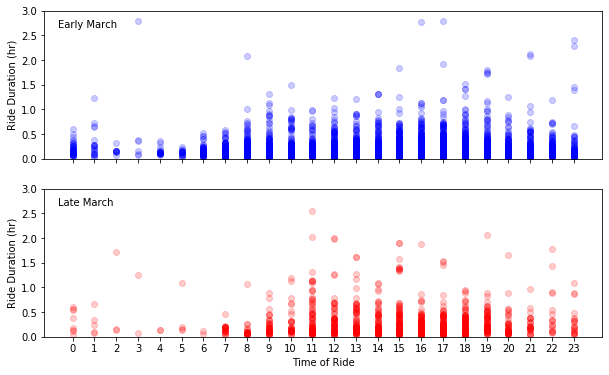

In [76]:
f, ax = plt.subplots(2, 1, figsize = (10, 6), sharex = True, sharey = True)

# Plot early March data on the first panel
ax[0].scatter(earlyBART['start_hour'], earlyBART['duration_hour'], 
              alpha = 0.2, color = 'b', edgecolors = 'b', label = 'Early March')
# Plot late March data on the second
ax[1].scatter(lateBART['start_hour'], lateBART['duration_hour'],
              alpha = 0.2, color = 'r', edgecolors = 'r', label = 'Late March')
# Set axes specifications
for i in range(len(ax)):
    ax[i].set_ylim(0, 3)
    ax[i].set_ylabel('Ride Duration (hr)')
    # Labels each axis and removes marker
    ax[i].legend(loc = 'upper left', markerscale=0, handletextpad=-1.5, frameon=False)

plt.xticks(np.arange(0, 24))
plt.xlabel('Time of Ride');

`Figure`

Here we see that BART stations still receive a decent amount of traffic. However, it's a little hard to see the differences between the rides with the data so zoomed out. If we cut our figure to only include rides that lasted for an hour or less, we might be able to discriminate a little better.

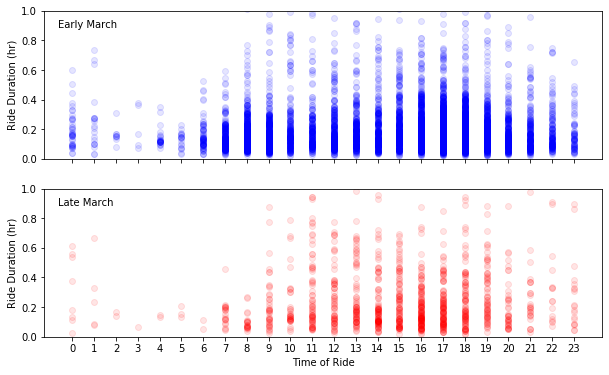

In [77]:
f, ax = plt.subplots(2, 1, figsize = (10, 6), sharex = True, sharey = True)

ax[0].scatter(earlyBART['start_hour'], earlyBART['duration_hour'], 
              alpha = 0.1, color = 'b', edgecolors = 'b', label = 'Early March')
ax[1].scatter(lateBART['start_hour'], lateBART['duration_hour'],
              alpha = 0.1, color = 'r', edgecolors = 'r', label = 'Late March')
for i in range(len(ax)):
    ax[i].set_ylim(0, 1)
    ax[i].set_ylabel('Ride Duration (hr)')
    ax[i].legend(loc = 'upper left', markerscale=0, handletextpad=-1.5, frameon=False)

plt.xticks(np.arange(0, 24))
plt.xlabel('Time of Ride');

`Figure`

Zoomed in, rides to the BART later in March look more like a more sparse smattering of points than those for earlier in the month. The increased transparancy in the second panel attests to decreased trips taken to the BART over March. Additionally, the sections of opacity for early in March extend up to around half an hour, whereas this same sections ends at around 15 or 20 minutes later in the month. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> These analyses more or less strengthened the obvious relationship between a decrease in ridership and progression through the month of March. 

### Were there any interesting or surprising interactions between features?

> I thought it was incredibly interesting to see the increase in that small subset of roundtrip routes. A deeper understanding into what is driving user behavior in these stations would require a little bit more data than what is made available by Lyft. I would love to at some point dive into Google Maps to see if those locations were related in any way. 

> I also am so surprised at how much I enjoyed this project. It's so cool to be able to more or less see how people move and react to Covid restrictions. San Francisco did a really great job about enacting social distancing orders way ahead of the curve, and their relatively small number of Covid cases is really a testament to that fact. So although we can imagine the steady decline in the number of users whizzing to work on Lyft bikes, as well as eerily empty BART stations, it's comforting to know that those social distancing measures are at least doing a lot to protect that general population.

```
```